# Load data for introductory exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from __future__ import division
import geoplotlib as gpl
import matplotlib.pyplot as plt
%matplotlib inline

collisions = pd.read_csv('./NYPD_Motor_Vehicle_Collisions.csv', low_memory=False)
# Remove uninteresting columns
cols = list(collisions.columns)

collisions = collisions[['DATE', 'TIME','LATITUDE', 'LONGITUDE','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]
# Drop observations where geodata is not available
#collisions.dropna(axis=0, how='any', subset=['LATITUDE','LONGITUDE'], inplace=True)


#collisions.to_csv('./CollisionsColsRemoved.csv')

In [4]:


# remove collisions clearly not in NYC
collisions = collisions[np.abs(collisions.LONGITUDE-collisions.LONGITUDE.mean())<=(2.05*collisions.LONGITUDE.std())]
collisions = collisions[np.abs(collisions.LATITUDE-collisions.LATITUDE.mean())<=(2.05*collisions.LATITUDE.std())]


bbox = gpl.utils.BoundingBox(north=np.amax(collisions.LATITUDE), west=np.amin(collisions.LONGITUDE), south=np.amin(collisions.LATITUDE), east=np.amax(collisions.LONGITUDE))
gpl.set_bbox(bbox)
geoplot_data = {'lat' : collisions.LATITUDE,
                'lon' : collisions.LONGITUDE}
gpl.kde(geoplot_data, bw=1)
gpl.inline()

('smallest non-zero count', 3.0448081344112276e-07)
('max count:', 128.04718395519785)


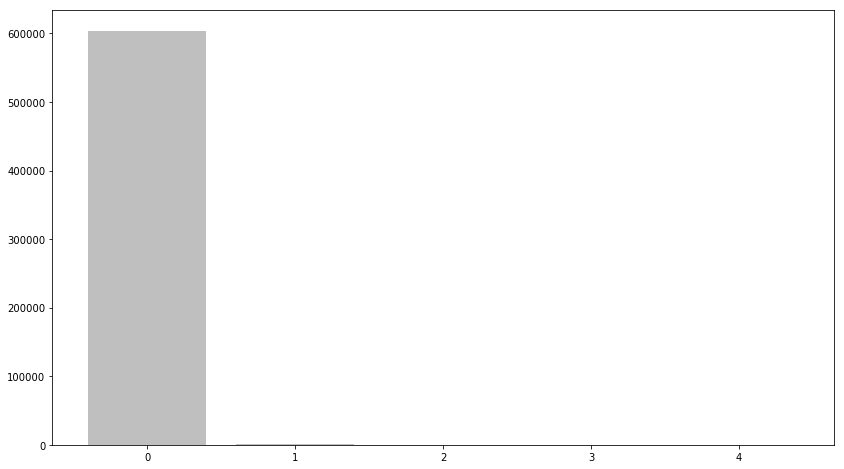

In [8]:


# barplot over number of casualties in collisions
numCasualties = Counter(collisions['NUMBER OF PERSONS KILLED'])

cats, vals = zip(*numCasualties.items())
cats = list(cats)
vals = list(vals)
ypos = range(len(cats))


fig = plt.figure(figsize=(14,8))
plt.bar(ypos, vals, align='center', alpha=0.5, color='grey')
_, labels = plt.xticks()
#plt.setp(labels, rotation = 90)
plt.show()


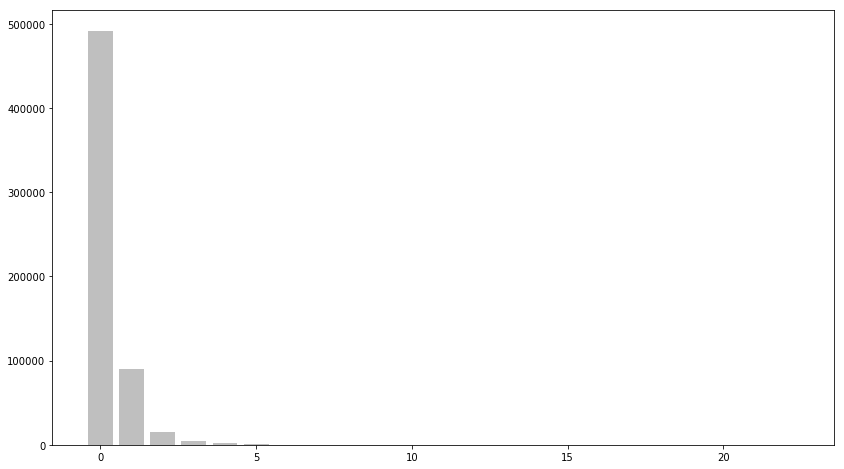

In [9]:
numInjuries = Counter(collisions['NUMBER OF PERSONS INJURED'])

cats, vals = zip(*numInjuries.items())
cats = list(cats)
vals = list(vals)
ypos = range(len(cats))


fig = plt.figure(figsize=(14,8))
plt.bar(ypos, vals, align='center', alpha=0.5, color='grey')
_, labels = plt.xticks()
#plt.setp(labels, rotation = 90)
plt.show()


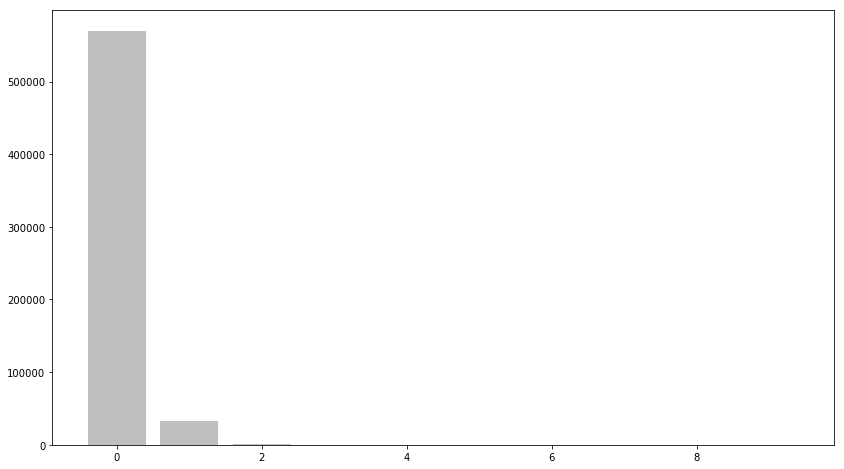

In [10]:
numPedestrians = Counter(collisions['NUMBER OF PEDESTRIANS INJURED'])

cats, vals = zip(*numPedestrians.items())
cats = list(cats)
vals = list(vals)
ypos = range(len(cats))


fig = plt.figure(figsize=(14,8))
plt.bar(ypos, vals, align='center', alpha=0.5, color='grey')
_, labels = plt.xticks()
#plt.setp(labels, rotation = 90)
plt.show()


In [58]:
# Density map of most dangerous places in traffic (highest amount of deaths)
collisionsDeath = collisions.loc[collisions['NUMBER OF PERSONS KILLED'] > 0]
collisionsDeath = collisionsDeath[['LONGITUDE', 'LATITUDE']]

#collisionsDeath = collisionsDeath[np.abs(collisionsDeath.LONGITUDE-collisionsDeath.LONGITUDE.mean())<=(2.05*collisionsDeath.LONGITUDE.std())]
#collisionsDeath = collisionsDeath[np.abs(collisionsDeath.LATITUDE-collisionsDeath.LATITUDE.mean())<=(2.05*collisionsDeath.LATITUDE.std())]
death_geo_data = {'lon' : collisionsDeath.LONGITUDE,
                  'lat' : collisionsDeath.LATITUDE}

bbox = gpl.utils.BoundingBox(north=np.amax(collisions.LATITUDE), west=np.amin(collisions.LONGITUDE), south=np.amin(collisions.LATITUDE), east=np.amax(collisions.LONGITUDE))
gpl.set_bbox(bbox)
gpl.dot(death_geo_data)
gpl.inline()

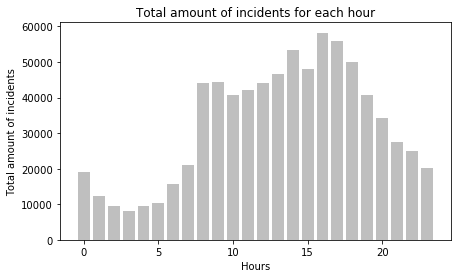

In [3]:
# barplot over time of day regardless of accident-type
def getHour(string):
    return int(string.split(':')[0])

hrs = collisions.TIME.apply(getHour)
collisions = collisions.assign(HOUR=pd.Series(hrs))

cHour = Counter(hrs)

#barplot

cats, vals = zip(*cHour.items())
cats = list(cats)
vals = list(vals)
ypos = range(len(cats))


fig = plt.figure(figsize=(7,4))
plt.bar(ypos, vals, align='center', alpha=0.5, color='grey')
_, labels = plt.xticks()
#plt.setp(labels, rotation = 90)
plt.title('Total amount of incidents for each hour')
plt.xlabel('Hours')
plt.ylabel('Total amount of incidents')
plt.show()



In [21]:
factorsAt16 = collisions[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'HOUR']]
factorsAt16 = factorsAt16.loc[factorsAt16['HOUR'] == 16]
cFactor16factor1 = Counter(factorsAt16['CONTRIBUTING FACTOR VEHICLE 1'])
cFactor16factor2 = Counter(factorsAt16['CONTRIBUTING FACTOR VEHICLE 2'])
cFactor16 = cFactor16factor1 + cFactor16factor2
cFactor16MC = cFactor16.most_common(10)
print cFactor16MC

[('Unspecified', 56213), ('Driver Inattention/Distraction', 7807), (nan, 5255), ('Fatigued/Drowsy', 3039), ('Failure to Yield Right-of-Way', 2497), ('Other Vehicular', 2436), ('Backing Unsafely', 1447), ('Turning Improperly', 1416), ('Lost Consciousness', 1400), ('Prescription Medication', 1013)]


In [59]:
# Check if specific places are more dangerous
collisionsTimesInjuries = collisions[['NUMBER OF PERSONS INJURED', 'LONGITUDE', 'LATITUDE', 'HOUR']]
collisionsTimesInjuries = collisionsTimesInjuries.loc[collisionsTimesInjuries['NUMBER OF PERSONS INJURED'] > 0]
timesInjuries_geo = {'lon' : collisionsTimesInjuries.LONGITUDE,
                     'lat' : collisionsTimesInjuries.LATITUDE}
bbox = gpl.utils.BoundingBox(north=np.amax(collisions.LATITUDE), west=np.amin(collisions.LONGITUDE), south=np.amin(collisions.LATITUDE), east=np.amax(collisions.LONGITUDE))
gpl.set_bbox(bbox)
gpl.kde(timesInjuries_geo, bw=1)
gpl.inline()

('smallest non-zero count', 1.7910636084771928e-08)
('max count:', 21.692718630869742)


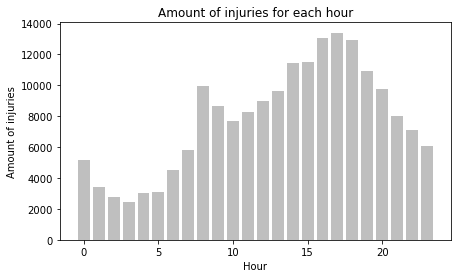

In [22]:
# Check if specific times are more dangerous
collisionsTimesInjuries = collisions[['NUMBER OF PERSONS INJURED', 'LONGITUDE', 'LATITUDE', 'HOUR']]
collisionsTimesInjuries = collisionsTimesInjuries.loc[collisionsTimesInjuries['NUMBER OF PERSONS INJURED'] > 0]
cHourInjuries = Counter(collisionsTimesInjuries.HOUR)

cats, vals = zip(*cHourInjuries.items())
cats = list(cats)
vals = list(vals)
ypos = range(len(cats))


fig = plt.figure(figsize=(7,4))
plt.bar(ypos, vals, align='center', alpha=0.5, color='grey')
_, labels = plt.xticks()
#plt.setp(labels, rotation = 90)
plt.xlabel('Hour')
plt.ylabel('Amount of injuries')
plt.title('Amount of injuries for each hour')
plt.show()


In [67]:
# Check if specific places are more dangerous
collisionsTimesKilled = collisions[['NUMBER OF PERSONS KILLED', 'LONGITUDE', 'LATITUDE', 'HOUR']]
collisionsTimesKilled = collisionsTimesKilled.loc[collisionsTimesKilled['NUMBER OF PERSONS KILLED'] > 0]
timesKilled_geo = {'lon' : collisionsTimesKilled.LONGITUDE,
                     'lat' : collisionsTimesKilled.LATITUDE}
bbox = gpl.utils.BoundingBox(north=np.amax(collisions.LATITUDE), west=np.amin(collisions.LONGITUDE), south=np.amin(collisions.LATITUDE), east=np.amax(collisions.LONGITUDE))
gpl.set_bbox(bbox)
gpl.kde(timesKilled_geo, bw=3)
gpl.inline()

('smallest non-zero count', 3.9803438079575307e-09)
('max count:', 0.09999461999657816)


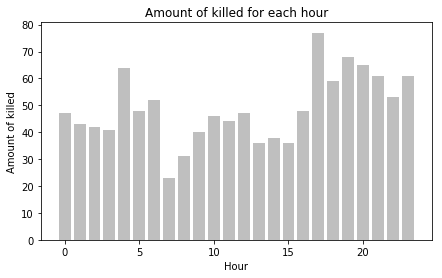

In [24]:
# Check if specific times are more dangerous
collisionsTimesKilled = collisions[['NUMBER OF PERSONS KILLED', 'LONGITUDE', 'LATITUDE', 'HOUR']]
collisionsTimesKilled = collisionsTimesKilled.loc[collisionsTimesKilled['NUMBER OF PERSONS KILLED'] > 0]
cHourKilled = Counter(collisionsTimesKilled.HOUR)

cats, vals = zip(*cHourKilled.items())
cats = list(cats)
vals = list(vals)
ypos = range(len(cats))


fig = plt.figure(figsize=(7,4))
plt.bar(ypos, vals, align='center', alpha=0.5, color='grey')
_, labels = plt.xticks()
#plt.setp(labels, rotation = 90)
plt.xlabel('Hour')
plt.ylabel('Amount of killed')
plt.title('Amount of killed for each hour')
plt.show()

In [46]:
collisionsDeaths = collisions[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','LONGITUDE', 'LATITUDE', 'HOUR']]
collisionsDeaths = collisionsDeaths[collisionsDeaths['NUMBER OF PERSONS KILLED']>0]
timesInjuries_geo = {'lon' : collisionsDeaths.LONGITUDE,
                     'lat' : collisionsDeaths.LATITUDE}
bbox = gpl.utils.BoundingBox(north=np.amax(collisions.LATITUDE), west=np.amin(collisions.LONGITUDE), south=np.amin(collisions.LATITUDE), east=np.amax(collisions.LONGITUDE))
gpl.set_bbox(bbox)
gpl.kde(timesInjuries_geo, bw=1)
gpl.inline()

('smallest non-zero count', 3.5821272169543856e-08)
('max count:', 0.49053198638025686)


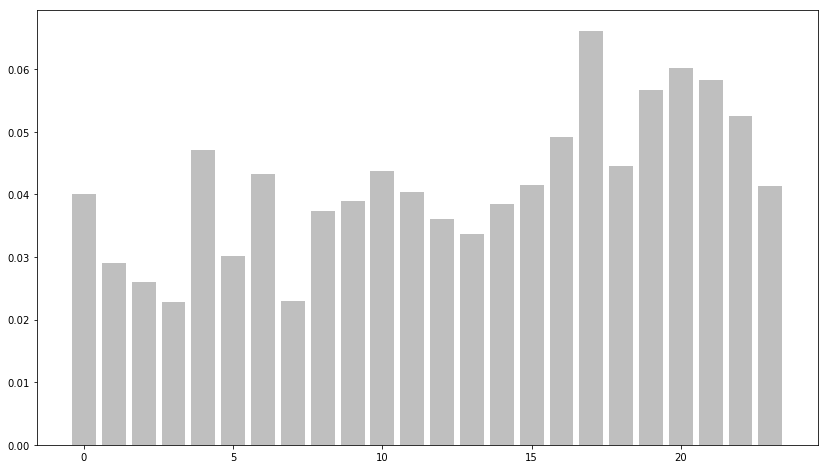

In [43]:
#Plot over timer der angiver hvor mange der døde ud af involverede der er
#Antaget at der er en død person.
collisionsDeaths['KILLED OUT OF INVOLVED']=collisionsDeaths['NUMBER OF PERSONS KILLED']/(collisionsDeaths['NUMBER OF PERSONS KILLED']+collisionsDeaths['NUMBER OF PERSONS INJURED'])
temp = []
for i in range(24):
    temp.append(collisionsDeaths[collisionsDeaths['HOUR']==i]['KILLED OUT OF INVOLVED'].sum())
temp = [float(i)/sum(temp) for i in temp]

cats = range(24)
vals = temp
ypos = range(24)


fig = plt.figure(figsize=(14,8))
plt.bar(ypos, vals, align='center', alpha=0.5, color='grey')
_, labels = plt.xticks()
plt.show()


In [42]:
collisionsDeaths[collisionsDeaths['HOUR']==17]

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  LONGITUDE  \
39053                           0                         1 -73.923250   
82139                           0                         1 -73.922966   
100249                          0                         1 -73.833286   
177500                          0                         1 -73.917577   
230192                          0                         1 -73.954655   
268979                          0                         1 -73.962104   
271845                          1                         1 -73.970367   
294617                          2                         1 -73.974439   
312911                          0                         1 -73.988176   
332562                          4                         1 -73.837536   
357784                          0                         1 -73.957125   
370619                          0                         1 -74.013424   
379346                          0                         1 -73.834053   
393238                          0                         1 -73.944891   
400577                          0                         1 -73.953953   
430013                          0                         1 -73.889819   
444646                          0                         1 -73.923475   
470598                          0                         1 -73.882412   
484755                          0                         1 -73.987292   
509050                          0                         1 -73.945373   
514399                          0                         1 -73.968740   
519748                          0                         1 -73.973503   
563198                          0                         1 -73.860674   
643544                          0                         1 -73.937797   
663274                          0                         1 -73.997434   
684849                          0                         1 -73.891752   
697645                          0                         1 -73.871207   
702154                          0                         1 -73.881667   
704049                          0                         1 -73.948171   
707891                          0                         1 -73.963410   
708540                          0                         1 -73.942981   
721855                          2                         1 -73.974801   
722620                          0                         1 -73.950337   
734754                          0                         1 -73.829400   
776509                          1                         1 -73.940766   
778287                          0                         1 -73.999917   
843901                          0                         1 -73.952531   
879909                          0                         1 -73.994360   
939919                          0                         1 -73.988870   
948411                          0                         1 -73.874504   

         LATITUDE  HOUR  KILLED OUT OF INVOLVED  
39053   40.864605    17                1.000000  
82139   40.684147    17                1.000000  
100249  40.762747    17                1.000000  
177500  40.654313    17                1.000000  
230192  40.786551    17                1.000000  
268979  40.598205    17                1.000000  
271845  40.794052    17                0.500000  
294617  40.686311    17                0.333333  
312911  40.774735    17                1.000000  
332562  40.691359    17                0.200000  
357784  40.640169    17                1.000000  
370619  40.648800    17                1.000000  
379346  40.710027    17                1.000000  
393238  40.664175    17                1.000000  
400577  40.683582    17                1.000000  
430013  40.658920    17                1.000000  
444646  40.825414    17                1.000000  
470598  40.648441    17                1.000000  
484755  40.750453    17

In [52]:
collisions.columns

Index([u'DATE', u'TIME', u'LATITUDE', u'LONGITUDE',
       u'NUMBER OF PERSONS INJURED', u'NUMBER OF PERSONS KILLED',
       u'NUMBER OF PEDESTRIANS INJURED', u'NUMBER OF PEDESTRIANS KILLED',
       u'NUMBER OF CYCLIST INJURED', u'NUMBER OF CYCLIST KILLED',
       u'NUMBER OF MOTORIST INJURED', u'NUMBER OF MOTORIST KILLED',
       u'CONTRIBUTING FACTOR VEHICLE 1', u'CONTRIBUTING FACTOR VEHICLE 2',
       u'CONTRIBUTING FACTOR VEHICLE 3', u'CONTRIBUTING FACTOR VEHICLE 4',
       u'CONTRIBUTING FACTOR VEHICLE 5', u'VEHICLE TYPE CODE 1',
       u'VEHICLE TYPE CODE 2', u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4',
       u'VEHICLE TYPE CODE 5', u'HOUR'],
      dtype='object')

In [72]:
collisionsTimesCauses = collisions[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5', 'LONGITUDE', 'LATITUDE', 'HOUR']]
Counter(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 1']+collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 2'])

Counter({nan: 74666,
         'Unsafe Lane ChangingOther Vehicular': 36,
         'Pedestrian/Bicyclist/Other Pedestrian Error/ConfusionUnspecified': 180,
         'Alcohol InvolvementPhysical Disability': 12,
         'GlarePavement Defective': 1,
         'Lane Marking Improper/InadequateGlare': 1,
         'Reaction to Other Uninvolved VehiclePhysical Disability': 3,
         'Turning ImproperlyAlcohol Involvement': 4,
         'Other Electronic DevicePavement Slippery': 2,
         'Obstruction/DebrisOversized Vehicle': 2,
         'Driver Inattention/DistractionPedestrian/Bicyclist/Other Pedestrian Error/Confusion': 39,
         'Unsafe SpeedOther Vehicular': 16,
         'Other VehicularUnspecified': 4226,
         'Following Too CloselyReaction to Other Uninvolved Vehicle': 49,
         'Following Too CloselyOversized Vehicle': 9,
         'Other VehicularObstruction/Debris': 3,
         'Traffic Control Device Improper/Non-WorkingTraffic Control Device Improper/Non-Working': 11

['Shoulders Defective/Improper', 'Windshield Inadequate', 'Other Lighting Defects', 'Headlights Defective', 'Tow Hitch Defective', 'Cell Phone (hand-held)', 'Driverless/Runaway Vehicle', 'Cell Phone (hands-free)', 'Animals Action', 'Accelerator Defective', 'Drugs (Illegal)', 'Lane Marking Improper/Inadequate', 'Traffic Control Device Improper/Non-Working', 'Tire Failure/Inadequate', 'Steering Failure', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Pavement Defective', 'Fell Asleep', 'Glare', 'Failure to Keep Right', 'Obstruction/Debris', 'Brakes Defective', 'Unsafe Speed', 'Other Electronic Device', 'Reaction to Other Uninvolved Vehicle', 'Illness', 'Aggressive Driving/Road Rage', 'View Obstructed/Limited', 'Unsafe Lane Changing', 'Passing or Lane Usage Improper', 'Passenger Distraction', 'Alcohol Involvement', 'Oversized Vehicle', 'Pavement Slippery', 'Following Too Closely', 'Outside Car Distraction', 'Physical Disability', 'Traffic Control Disregarded', 'Driver Inexperie

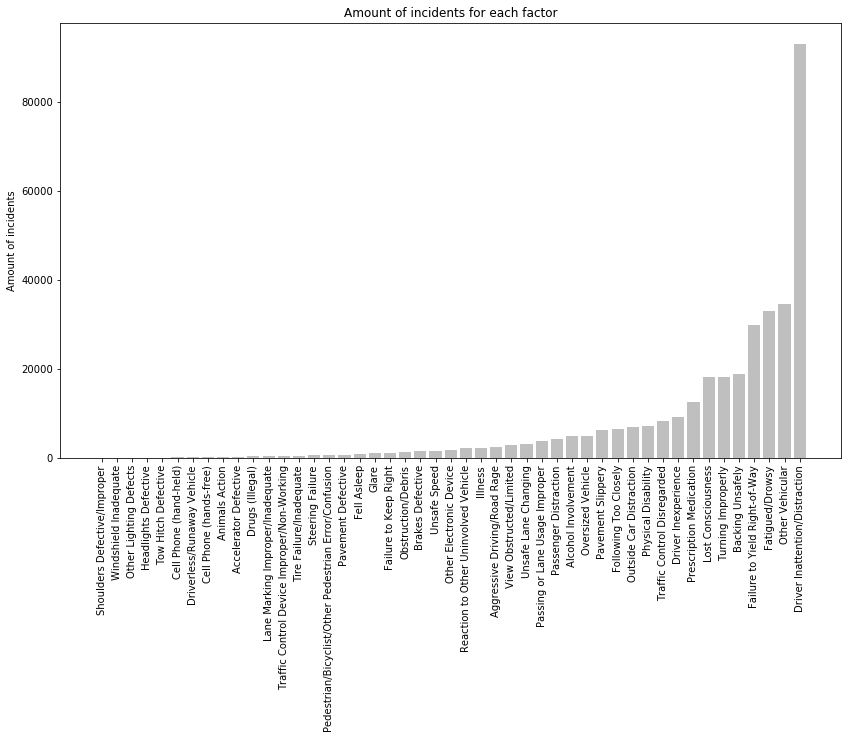

In [88]:
# Causes of traffic incidents
collisionsTimesCauses = collisions[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5', 'LONGITUDE', 'LATITUDE', 'HOUR']]
collisionsTimesCauses = collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 1','HOUR'].append(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 2','HOUR'],ignore_index = True).append(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 3','HOUR'],ignore_index = True).append(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 4','HOUR'],ignore_index = True).append(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 5','HOUR'],ignore_index = True)
collisionsTimesCauses = collisionsTimesCauses.dropna()
# Check if specific times are more dangerous
CCauses = Counter(collisionsTimesCauses)

cats, vals = zip(*sorted(CCauses.items(), key = lambda x : x[1]))
cats = list(cats)
vals = list(vals)
ypos = range(len(cats))
print cats, vals, ypos


fig = plt.figure(figsize=(14,8))
plt.bar(ypos, vals, align='center', alpha=0.5, color='grey')
_, labels = plt.xticks(ypos, tuple(cats))
plt.setp(labels, rotation = 90)
plt.ylabel('Amount of incidents')
plt.title('Amount of incidents for each factor')
plt.show()

In [77]:
test=collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 1'].append(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 2'],ignore_index = True).append(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 3'],ignore_index = True).append(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 4'],ignore_index = True).append(collisionsTimesCauses['CONTRIBUTING FACTOR VEHICLE 5'],ignore_index = True)

In [80]:
test.dropna()[test!='Unspecified']

0                             Driver Inattention/Distraction
1                              Failure to Yield Right-of-Way
2                                      Following Too Closely
3                                Traffic Control Disregarded
10                                         Pavement Slippery
12                                      Unsafe Lane Changing
13                                           Other Vehicular
14                            Driver Inattention/Distraction
15                            Driver Inattention/Distraction
22                                          Backing Unsafely
24         Pedestrian/Bicyclist/Other Pedestrian Error/Co...
25                            Driver Inattention/Distraction
26                                         Pavement Slippery
27                                           Other Vehicular
28                                        Obstruction/Debris
29                            Passing or Lane Usage Improper
31                      

In [5]:
def getYear(string):
    return int(string.split('/')[-1])
collisionsYear = collisions[collisions.DATE.apply(getYear)==2012]


In [6]:
collisionsYear

DATE   TIME   LATITUDE  LONGITUDE  NUMBER OF PERSONS INJURED  \
863608   11/05/2012   8:50        NaN        NaN                          0   
863938   10/02/2012  14:00        NaN        NaN                          0   
869605   12/27/2012   2:45  40.737459 -73.741083                          0   
870695   12/25/2012   6:08  40.733610 -73.923840                          0   
870719   12/22/2012  22:20        NaN        NaN                          0   
870766   12/19/2012  15:30  40.823139 -73.882237                          0   
871213   12/14/2012  14:30        NaN        NaN                          0   
871381   12/13/2012   9:00        NaN        NaN                          0   
871852   12/09/2012   8:05  40.847898 -73.945216                          0   
872534   12/05/2012  23:44        NaN        NaN                          2   
872583   11/15/2012  18:40        NaN        NaN                          0   
873730   11/13/2012   9:20        NaN        NaN                          0   
874394   11/08/2012  22:12  40.816657 -73.894059                          0   
874513   11/08/2012   3:45        NaN        NaN                          0   
874584   10/27/2012  22:30  40.762094 -73.756905                          0   
874795   10/23/2012  17:21        NaN        NaN                          1   
875268   10/19/2012  11:17        NaN        NaN                          0   
875292   10/19/2012  15:00  40.741735 -73.728289                          0   
875340   10/18/2012  16:20  40.608255 -74.088781                          0   
875534   10/16/2012  12:30        NaN        NaN                          0   
875767   10/16/2012  12:30        NaN        NaN                          3   
875791   10/12/2012  23:25        NaN        NaN                          0   
875816   10/11/2012   8:30        NaN        NaN                          0   
875840   10/10/2012  23:25        NaN        NaN                          0   
876457   10/05/2012   9:34        NaN        NaN                          0   
876552   10/04/2012   3:51        NaN        NaN                          0   
876764   10/04/2012   9:54  40.738862 -73.739727                          3   
877927   10/02/2012  14:00  40.869591 -73.820392                          1   
906439   12/31/2012  13:10  40.594589 -73.908571                          0   
906463   12/31/2012   5:45  40.732941 -73.920382                          0   
...             ...    ...        ...        ...                        ...   
1007100  07/01/2012   8:15  40.739979 -73.877108                          0   
1007101  07/01/2012   8:27  40.680857 -73.938546                          0   
1007102  07/01/2012   8:27  40.708797 -73.727620                          2   
1007103  07/01/2012   8:30        NaN        NaN                          0   
1007104  07/01/2012   8:34  40.668798 -73.931120                          2   
1007105  07/01/2012   8:37  40.694545 -73.802112                          1   
1007106  07/01/2012   8:43        NaN        NaN                          0   
1007107  07/01/2012   8:58  40.891840 -73.862740                          0   
1007108  07/01/2012   9:00  40.744131 -73.927047                          0   
1007109  07/01/2012   9:00  40.757859 -73.975592                          1   
1007110  07/01/2012   9:15  40.675380 -73.908196                          0   
1007111  07/01/2012   9:15  40.696308 -73.851549                          0   
1007112  07/01/2012   9:15  40.711860 -73.735538                          0   
1007113  07/01/2012   9:15  40.634748 -74.112253                          0   
1007114  07/01/2012   9:24  40.690917 -73.728179                          0   
1007115  07/01/2012   9:30  40.861637 -73.824326                          0   
1007116  07/01/2012   9:30  40.626826 -73.996790                          0   
1007117  07/01/2012   9:30  40.755336 -73.843245                          0   
1007118  07/01/2012   9:30  40.678163 -73.897477                 

In [14]:
# Causes of traffic incidents
collisionsTimesCauses = collisions[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5', 'LONGITUDE', 'LATITUDE', 'HOUR']]
#collisionsTimesCauses = collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 1','HOUR']].append(collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 2','HOUR']],ignore_index = True).append(collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 3','HOUR']],ignore_index = True).append(collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 4','HOUR']],ignore_index = True).append(collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 5','HOUR']],ignore_index = True)
#collisionsTimesCauses = collisionsTimesCauses.dropna()

In [11]:
collisionsTimesCauses

CONTRIBUTING FACTOR VEHICLE 1   CONTRIBUTING FACTOR VEHICLE 2  \
0        Driver Inattention/Distraction  Driver Inattention/Distraction   
1        Driver Inattention/Distraction                     Unspecified   
2         Failure to Yield Right-of-Way                             NaN   
3                                   NaN                             NaN   
4                 Following Too Closely                 Other Vehicular   
5           Traffic Control Disregarded                     Unspecified   
6                           Unspecified                     Unspecified   
7                           Unspecified                     Unspecified   
9           Traffic Control Disregarded                     Unspecified   
10                          Unspecified                             NaN   
11                          Unspecified                     Unspecified   
12          Traffic Control Disregarded                     Unspecified   
13                          Unspecified                     Unspecified   
14                          Unspecified                     Unspecified   
16                    Pavement Slippery               Pavement Slippery   
17                          Unspecified                     Unspecified   
19                 Unsafe Lane Changing                             NaN   
20                 Unsafe Lane Changing                     Unspecified   
21                      Other Vehicular                 Other Vehicular   
22       Driver Inattention/Distraction                     Unspecified   
23       Driver Inattention/Distraction                     Unspecified   
24       Driver Inattention/Distraction                     Unspecified   
25          Traffic Control Disregarded     Traffic Control Disregarded   
26                          Unspecified                             NaN   
27                          Unspecified                             NaN   
28                                  NaN                             NaN   
29                          Unspecified                             NaN   
30                          Unspecified                             NaN   
31        Failure to Yield Right-of-Way                             NaN   
32                          Unspecified                     Unspecified   
...                                 ...                             ...   
1007095                     Unspecified                     Unspecified   
1007096                     Unspecified                     Unspecified   
1007098                         Illness                     Unspecified   
1007099                     Unspecified                     Unspecified   
1007100                     Unspecified                     Unspecified   
1007101                     Unspecified                     Unspecified   
1007102     Traffic Control Disregarded                             NaN   
1007104                     Unspecified                     Unspecified   
1007105                     Unspecified                             NaN   
1007108                     Unspecified                     Unspecified   
1007109  Driver Inattention/Distraction                             NaN   
1007110                     Unspecified                     Unspecified   
1007111           Failure to Keep Right                     Unspecified   
1007112                     Unspecified                     Unspecified   
1007113                     Unspecified                     Unspecified   
1007114                     Unspecified                     Unspecified   
1007115                     Unspecified                     Unspecified   
1007116                     Unspecified                     Unspecified   
1007117                     Unspecified                     Unspecified   
1007118                     Unspecified                     Unspecified   
1007119                     Unspecified                     Unspecified   
1007120                Backing Unsa

In [34]:
collisionsTimesCauses = collisions[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5', 'LONGITUDE', 'LATITUDE', 'HOUR']]
df_1=collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 1','HOUR']].dropna()
df_2=collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 2','HOUR']].dropna()
df_3=collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 3','HOUR']].dropna()
df_4=collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 4','HOUR']].dropna()
df_5=collisionsTimesCauses[['CONTRIBUTING FACTOR VEHICLE 5','HOUR']].dropna()
df_1.columns = ['CONTRIBUTING FACTOR VEHICLE','HOUR']
df_2.columns = ['CONTRIBUTING FACTOR VEHICLE','HOUR']
df_3.columns = ['CONTRIBUTING FACTOR VEHICLE','HOUR']
df_4.columns = ['CONTRIBUTING FACTOR VEHICLE','HOUR']
df_5.columns = ['CONTRIBUTING FACTOR VEHICLE','HOUR']
df_full = pd.concat([df_1,df_2,df_3,df_4,df_5])
df_full = df_full[df_full['CONTRIBUTING FACTOR VEHICLE']!='Unspecified']
CCauses = Counter(df_full['CONTRIBUTING FACTOR VEHICLE'])

cats, vals = zip(*sorted(CCauses.items(), key = lambda x : x[1]))
cats = list(cats)
vals = list(vals)
print cats, vals, ypos

['Shoulders Defective/Improper', 'Windshield Inadequate', 'Headlights Defective', 'Other Lighting Defects', 'Tow Hitch Defective', 'Cell Phone (hand-held)', 'Driverless/Runaway Vehicle', 'Cell Phone (hands-free)', 'Accelerator Defective', 'Animals Action', 'Lane Marking Improper/Inadequate', 'Drugs (Illegal)', 'Traffic Control Device Improper/Non-Working', 'Tire Failure/Inadequate', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Steering Failure', 'Pavement Defective', 'Fell Asleep', 'Obstruction/Debris', 'Glare', 'Failure to Keep Right', 'Brakes Defective', 'Other Electronic Device', 'Unsafe Speed', 'Illness', 'Aggressive Driving/Road Rage', 'Reaction to Other Uninvolved Vehicle', 'View Obstructed/Limited', 'Unsafe Lane Changing', 'Passenger Distraction', 'Passing or Lane Usage Improper', 'Oversized Vehicle', 'Alcohol Involvement', 'Physical Disability', 'Following Too Closely', 'Outside Car Distraction', 'Pavement Slippery', 'Traffic Control Disregarded', 'Driver Inexperie

In [37]:
cats[-7:]

['Lost Consciousness',
 'Turning Improperly',
 'Backing Unsafely',
 'Other Vehicular',
 'Failure to Yield Right-of-Way',
 'Fatigued/Drowsy',
 'Driver Inattention/Distraction']

In [49]:
dict_hour = {}
for index in cats[-7:]:
    factor = []
    for hour in range(24):
        factor.append(df_full[(df_full['HOUR']==hour) & (df_full['CONTRIBUTING FACTOR VEHICLE']==index)].shape[0])
    dict_hour[index] = factor

In [58]:
pd.DataFrame.from_dict(dict_hour).to_json('Hourly_factor.json', orient = "records")

2013 203715
2014 205960
2015 217636
2016 227658
